# Machine Learning No Supervisado

Índice 

 

- Definición del problema. 
- Análisis y Tratamiento de los datos: Categóricos, Texto y Numéricos. 
- Clusterizacion con KMeans. 
- Reducción de Dimensionalidad con PCA. 
- Clusteriazacion y PCA. 
- Conclusiones 

 

En este notebook vamos a exponer diferentes ejemplos de machine learning no supervisado, asi como el tratamiento de los datos necesario para poder ser alimentados en dichos modelos.

#### Imports

In [18]:
import pandas as pd
import numpy as np
from skimpy import skim
import sidetable


rn_state = 42 # random state for reproducibility

## Definición del problema

Pertenecemos a una compañía que se dedica a vender vino online.

Se quiere crear una página de recomendación de vinos para los clientes de la compañía.

Se nos ha dado información de los vinos actuales en la página y se nos pide crear un algoritmo para haer estas recomendaciones

https://www.kaggle.com/datasets/elvinrustam/wine-dataset/code

In [19]:
df_wine = pd.read_csv('WineDataset.csv')
df_wine.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


## Identificadores y variables inecesarias

Vemos qué variables no nos aportan información o no podemos usarlas.

In [20]:
skim(df_wine)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1290   │ │ string      │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unit             │    9 │     0.7 │    10.18 │    2.319 │    0 │   9.4 │   10.1 │   10.5 │    39 │    ▇    │  │
│ └──────────────────┴──────┴─────────┴──────────┴──────────┴──────┴───────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Title                               │       0 │          0 │                     6.4 │                8303 │  │
│ │ Description                         │       4 │       0.31 │                      86 │              111038 │  │
│ │ Price                               │       0 │          0 │                       3 │                3865 │  │
│ │ Capacity                            │       0 │          0 │                       1 │                1290 │  │
│ │ Grape                               │      15 │       1.16 │                     1.3 │                1710 │  │
│ │ Secondary Grape Varieties           │     802 │      62.17 │                    0.93 │                1199 │  │
│ │ Closure                             │      11 │       0.85 │                     1.7 │                2137 │  │
│ │ Country                             │       6 │       0.47 │                     1.1 │                1453 │  │
│ │ Characteristics                     │      37 │       2.87 │                     5.5 │                7052 │  │
│ │ Per bottle / case / each            │       0 │          0 │                       2 │                2575 │  │
│ │ Type                                │       5 │       0.39 │                       1 │                1285 │  │
│ │ ABV                                 │       9 │        0.7 │                       2 │                2562 │  │
│ │ Region                              │     166 │      12.87 │                     1.1 │                1477 │  │
│ │ Style                               │      78 │       6.05 │                       3 │                3885 │  │
│ │ Vintage                             │       7 │       0.54 │                    0.99 │                1283 │  │
│ │ Appellation                         │     646 │      50.08 │                    0.75 │                 965 │  │
│ └─────────────────────────────────────┴─────────┴─────

In [21]:
df_wine.drop_duplicates(subset=['Title'], keep='first', inplace=True)

In [22]:
df_wine.drop(['Title', 'Description'], axis=1, inplace=True)

Nos deshacemos de su nombre, puesto que no aporta información más allá de su identificación.

Nos deshacemos de la variable "description" puesto que aún no conocemos modelos que puedan interpretarlo.

## Variables Numéricas

Empezamos analizando los datos numéricos: Price, Capacity, Vintage, ABV

In [23]:
df_wine.stb.freq(["Price"])

,Price,count,percent,cumulative_count,cumulative_percent
0,£11.99 per bottle,100,7.757952,100,7.757952
1,£14.99 per bottle,96,7.447634,196,15.205586
2,£9.99 per bottle,90,6.982157,286,22.187742
3,£13.99 per bottle,77,5.973623,363,28.161365
4,£16.99 per bottle,67,5.197828,430,33.359193
...,...,...,...,...,...
123,£13.49 per bottle,1,0.077580,1285,99.689682
124,£13.00 per bottle,1,0.077580,1286,99.767261
125,£120.00 per case,1,0.077580,1287,99.844841
126,£120.00 per bottle,1,0.077580,1288,99.922420


Vemos que no tenemos todos los precios por botella.

Pero tenemos otra columna que nos indica qué tipo de precio tenemos

In [24]:
df_wine.stb.freq(['Per bottle / case / each'])

,Per bottle / case / each,count,percent,cumulative_count,cumulative_percent
0,per bottle,1278,99.146625,1278,99.146625
1,per case,6,0.465477,1284,99.612102
2,each,5,0.387898,1289,100.000000


In [25]:
df_wine.stb.freq(['Capacity'])

,Capacity,count,percent,cumulative_count,cumulative_percent
0,75CL,1192,92.474787,1192,92.474787
1,37.5CL,23,1.784329,1215,94.259116
2,750ML,18,1.396431,1233,95.655547
3,1.5LTR,18,1.396431,1251,97.051978
4,150CL,11,0.853375,1262,97.905353
5,50CL,8,0.620636,1270,98.525989
6,Our,6,0.465477,1276,98.991466
7,2.25L,4,0.310318,1280,99.301784
8,70CL,3,0.232739,1283,99.534523
9,500ML,3,0.232739,1286,99.767261


In [26]:
df_wine.stb.freq(['Vintage'])

,Vintage,count,percent,cumulative_count,cumulative_percent
0,2022,318,24.804992,318,24.804992
1,2021,261,20.358814,579,45.163807
2,2020,194,15.132605,773,60.296412
3,NV,170,13.260530,943,73.556942
4,2019,101,7.878315,1044,81.435257
5,2018,69,5.382215,1113,86.817473
6,2017,45,3.510140,1158,90.327613
7,2016,22,1.716069,1180,92.043682
8,2015,19,1.482059,1199,93.525741
9,2014,17,1.326053,1216,94.851794


In [27]:
df_wine.stb.freq(['ABV'])

,ABV,count,percent,cumulative_count,cumulative_percent
0,ABV 13.50%,249,19.453125,249,19.453125
1,ABV 13.00%,231,18.046875,480,37.500000
2,ABV 14.00%,188,14.687500,668,52.187500
3,ABV 14.50%,178,13.906250,846,66.093750
4,ABV 12.50%,174,13.593750,1020,79.687500
5,ABV 12.00%,111,8.671875,1131,88.359375
6,ABV 15.00%,45,3.515625,1176,91.875000
7,ABV 11.00%,24,1.875000,1200,93.750000
8,ABV 11.50%,16,1.250000,1216,95.000000
9,ABV 20.00%,13,1.015625,1229,96.015625


vemos que todas las variables no aparecen como números así que tendremos que modificarlas, esto lo hacemos creando funciones y llamando a la función apply

## Transformación de variables numéricas

In [28]:
import re

def normalize_wine_vintage(row):
    vintage = row['Vintage']
    if (vintage == 'NV') or vintage is np.nan:
        return np.nan
    else:
        vintage = re.search(r'\d+', vintage)[0]
    return int(vintage)

def normalize_wine_price(row):
    price = row['Price']
    price = re.search(r'\d+\.\d*', price)[0]
    price = float(price)
    if 'case' in row['Per bottle / case / each']:
        price = price / 12
    return price

def ABV_to_proportion(row):
    if not pd.isna(row['ABV']):
        abv = re.search(r'\d+.\d*', row['ABV'])[0]
        return float(abv)/100
    else:
        return None
    
def normalize_wine_capacity_to_cl(row):
    capacity = row['Capacity']
    if 'our' in capacity.lower():
        return np.nan
    capacity = re.search(r'\d+\.?\d*', capacity)[0]
    capacity = float(capacity)
    if 'ml' in row['Capacity'].lower():
        capacity = capacity / 10
    if 'l' in row['Capacity'].lower():
        capacity = capacity * 100
    return int(capacity)

In [29]:
df_wine['Vintage'] = df_wine.apply(normalize_wine_vintage, axis=1)
df_wine['Vintage'] = df_wine['Vintage'].fillna(round(df_wine['Vintage'].mean()))
df_wine.head()

,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,2020.0,NaN
1,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021.0,Napa Valley
2,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022.0,NaN
3,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022.0,Macon
4,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021.0,Napa Valley


In [30]:
df_wine['Price'] = df_wine.apply(normalize_wine_price, axis=1)
df_wine.head()

,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,2020.0,NaN
1,15.99,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021.0,Napa Valley
2,12.49,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022.0,NaN
3,17.99,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022.0,Macon
4,15.99,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021.0,Napa Valley


In [31]:
df_wine['ABV'] = df_wine.apply(ABV_to_proportion, axis=1)
df_wine.dropna(inplace=True, subset=['ABV'])
df_wine.head()

,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,0.140,NaN,Rich & Juicy,2020.0,NaN
1,15.99,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,0.135,California,Rich & Toasty,2021.0,Napa Valley
2,12.49,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,0.130,Marlborough,Crisp & Zesty,2022.0,NaN
3,17.99,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,0.135,Burgundy,Ripe & Rounded,2022.0,Macon
4,15.99,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,0.135,California,Smooth & Mellow,2021.0,Napa Valley


In [32]:
df_wine['Capacity'] = df_wine.apply(normalize_wine_capacity_to_cl, axis=1)
df_wine['Capacity'] = df_wine['Capacity'].fillna(df_wine['Capacity'].mode()[0])
df_wine.head()

,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,7500,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,0.140,NaN,Rich & Juicy,2020.0,NaN
1,15.99,7500,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,0.135,California,Rich & Toasty,2021.0,Napa Valley
2,12.49,7500,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,0.130,Marlborough,Crisp & Zesty,2022.0,NaN
3,17.99,7500,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,0.135,Burgundy,Ripe & Rounded,2022.0,Macon
4,15.99,7500,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,0.135,California,Smooth & Mellow,2021.0,Napa Valley


In [33]:
df_wine.drop('Per bottle / case / each', axis=1, inplace=True)
df_wine.drop('Unit', axis=1, inplace=True)

# Grape information

Tenemos dos columnas relacionadas con el tipo de uva, la primera es la uva principal y la segunda es la uva secundaria.

Analizamos si ambas son necesarias y cómo trabajarlas

In [34]:
print('main grape missing:', len(df_wine[df_wine['Grape'].isna()])*100/len(df_wine['Grape']), '%')
print('secondary grape missing:', len(df_wine[df_wine['Secondary Grape Varieties'].isna()])*100/len(df_wine['Secondary Grape Varieties']), '%')


main grape missing: 0.703125 %
secondary grape missing: 62.03125 %


Hay un gran número de vino sin uva secundaria, por lo tanto podemos decidir que no es una columna de interés

A las uvas principales que faltan les asignamos el valor "Other"

In [35]:
df_wine['Grape'] = df_wine['Grape'].fillna('Other')
df_wine['Grape'] = df_wine['Grape'].astype('category')
df_wine = df_wine.drop('Secondary Grape Varieties', axis=1)
df_wine.head()

,Price,Capacity,Grape,Closure,Country,Characteristics,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,7500,Tempranillo,Natural Cork,Spain,"Vanilla, Blackberry, Blackcurrant",Red,0.140,NaN,Rich & Juicy,2020.0,NaN
1,15.99,7500,Chardonnay,Natural Cork,USA,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",White,0.135,California,Rich & Toasty,2021.0,Napa Valley
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",White,0.130,Marlborough,Crisp & Zesty,2022.0,NaN
3,17.99,7500,Chardonnay,Natural Cork,France,"Peach, Apricot, Floral, Lemon",White,0.135,Burgundy,Ripe & Rounded,2022.0,Macon
4,15.99,7500,Pinot Noir,Natural Cork,USA,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",Red,0.135,California,Smooth & Mellow,2021.0,Napa Valley


In [36]:
print('Country missing:', len(df_wine[df_wine['Country'].isna()])*100/len(df_wine['Country']), '%')
print('Region missing:', len(df_wine[df_wine['Region'].isna()])*100/len(df_wine['Region']), '%')
print('Type missing:', len(df_wine[df_wine['Type'].isna()])*100/len(df_wine['Type']), '%')
print('Closure missing:', len(df_wine[df_wine['Closure'].isna()])*100/len(df_wine['Closure']), '%')
print('Appellation missing:', len(df_wine[df_wine['Appellation'].isna()])*100/len(df_wine['Appellation']), '%')


Country missing: 0.0 %
Region missing: 12.265625 %
Type missing: 0.390625 %
Closure missing: 0.390625 %
Appellation missing: 49.6875 %


In [38]:
df_wine['Region'] = df_wine['Region'].fillna('Other')
df_wine['Region'] = df_wine['Region'].astype('category')

In [39]:
df_wine['Type'].value_counts(dropna=False)

Type
White     581
Red       565
Rosé      122
NaN         5
Tawny       4
Orange      2
Brown       1
Name: count, dtype: int64

In [40]:
df_wine["Type"] = df_wine['Type'].fillna('Other')
df_wine['Type'] = df_wine['Type'].astype('category')

In [41]:
df_wine['Closure'].value_counts(dropna=False)

Closure
Natural Cork      830
Screwcap          414
Synthetic Cork     24
Vinolok             7
NaN                 5
Name: count, dtype: int64

In [42]:
df_wine['Closure'] = df_wine['Closure'].fillna(df_wine['Closure'].mode()[0])
df_wine['Closure'] = df_wine['Closure'].astype('category')
df_wine['Closure'].value_counts(dropna=False)

Closure
Natural Cork      835
Screwcap          414
Synthetic Cork     24
Vinolok             7
Name: count, dtype: int64

In [43]:
df_wine['Appellation'].value_counts(dropna=False)

Appellation
NaN                     636
Rioja                    45
Barossa Valley           23
Chablis                  15
Côtes Du Rhône           14
                       ... 
Gascony                   1
Costières De Nîmes        1
Kremstal                  1
Lussac-Saint-Émilion      1
Eden Valley               1
Name: count, Length: 180, dtype: int64

In [44]:
df_wine.drop('Appellation', axis=1, inplace=True)

In [45]:
df_wine.head()

,Price,Capacity,Grape,Closure,Country,Characteristics,Type,ABV,Region,Style,Vintage
0,9.99,7500,Tempranillo,Natural Cork,Spain,"Vanilla, Blackberry, Blackcurrant",Red,0.140,Other,Rich & Juicy,2020.0
1,15.99,7500,Chardonnay,Natural Cork,USA,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",White,0.135,California,Rich & Toasty,2021.0
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",White,0.130,Marlborough,Crisp & Zesty,2022.0
3,17.99,7500,Chardonnay,Natural Cork,France,"Peach, Apricot, Floral, Lemon",White,0.135,Burgundy,Ripe & Rounded,2022.0
4,15.99,7500,Pinot Noir,Natural Cork,USA,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",Red,0.135,California,Smooth & Mellow,2021.0


# Multi-categorical

Tenemos un par de columnas que internamente son varias columnas: Characteristics y Style. 

Para poder usarlas deberíamos separarlas en varias columnas.

Esto nos dará más información, pero también nos dará más columnas.

In [46]:
caracteristics = df_wine['Characteristics'].str.get_dummies(sep=',')
caracteristics.head()

,Almond,Apricot,Banana,Biscuit,Black Cherry,Black Fruit,Black Pepper,Black Plum,Blackberry,Blackcurrant,...,Sweet Spice,Tobacco,Toffee,Tropical Fruit,Vanilla,Violet,Walnut,Watermelon,Wet Stones,White Pepper
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_wine_expanded = pd.concat([df_wine, caracteristics], axis=1)
df_wine_expanded = df_wine_expanded.drop('Characteristics', axis=1)
style = df_wine_expanded['Style'].str.get_dummies(sep='&')
df_wine_expanded = pd.concat([df_wine_expanded, style], axis=1)
df_wine_expanded = df_wine_expanded.drop('Style', axis=1)
df_wine_expanded.head()

,Price,Capacity,Grape,Closure,Country,Type,ABV,Region,Vintage,Almond,...,Bold,Crisp,Delicate,Fresh,Light,Rich,Ripe,Savoury,Smooth,Soft
0,9.99,7500,Tempranillo,Natural Cork,Spain,Red,0.140,Other,2020.0,0,...,0,0,0,0,0,1,0,0,0,0
1,15.99,7500,Chardonnay,Natural Cork,USA,White,0.135,California,2021.0,1,...,0,0,0,0,0,1,0,0,0,0
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,White,0.130,Marlborough,2022.0,0,...,0,1,0,0,0,0,0,0,0,0
3,17.99,7500,Chardonnay,Natural Cork,France,White,0.135,Burgundy,2022.0,0,...,0,0,0,0,0,0,1,0,0,0
4,15.99,7500,Pinot Noir,Natural Cork,USA,Red,0.135,California,2021.0,0,...,0,0,0,0,0,0,0,0,1,0


Comprobamos que ahora no tenemos valores nulos en el dataset

In [48]:
# Check the number of NAN values in the dataset
sum(df_wine_expanded.isna().sum())

0

In [49]:
print('number of observations:', len(df_wine))
print('number of characteristics before explotion:', len(df_wine.columns))
print('number of characteristics after explotion:', len(df_wine_expanded.columns))

number of observations: 1280
number of characteristics before explotion: 11
number of characteristics after explotion: 229


Hemos incrementado considerablemente el número de columnas, pero hemos ganado información.

Ahora podemos intentar reducir la información

## Clustering with KMeans

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

X = df_wine_expanded.copy()
cat_columns = df_wine_expanded.select_dtypes(['category']).columns

X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X.head()


,Price,Capacity,Grape,Closure,Country,Type,ABV,Region,Vintage,Almond,...,Crisp,Delicate,Fresh,Light,Rich,Ripe,Savoury,Smooth,Soft,Price_range
0,9.99,7500,94,0,22,3,0.140,57,2020.0,0,...,0,0,0,0,1,0,0,0,0,0
1,15.99,7500,16,0,23,6,0.135,13,2021.0,1,...,0,0,0,0,1,0,0,0,0,2
2,12.49,7500,87,1,15,6,0.130,49,2022.0,0,...,1,0,0,0,0,0,0,0,0,1
3,17.99,7500,16,0,6,6,0.135,12,2022.0,0,...,0,0,0,0,0,1,0,0,0,2
4,15.99,7500,76,0,23,3,0.135,13,2021.0,0,...,0,0,0,0,0,0,0,1,0,2


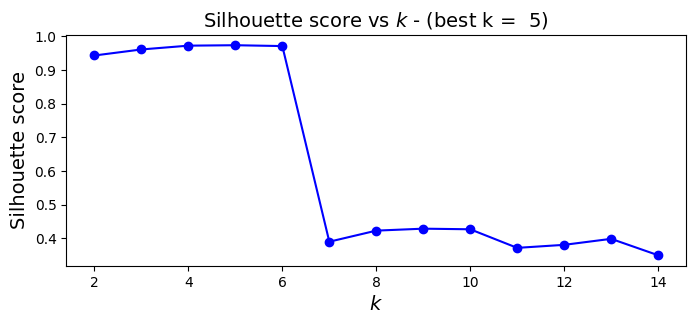

In [ ]:
max_k = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=rn_state).fit(X) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")
plt.title(f"Silhouette score vs $k$ - (best k =  {np.argmax(silhouette_scores)+2})", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.show()

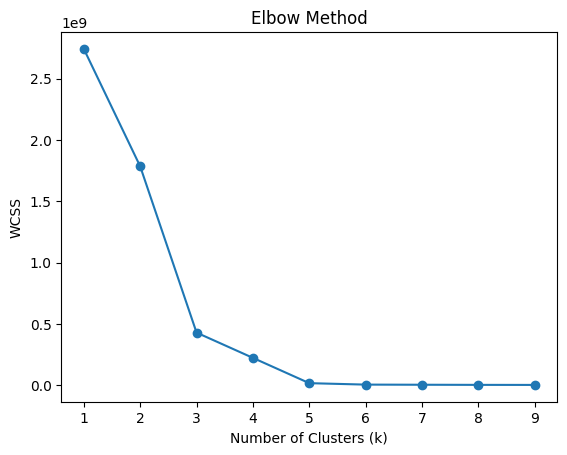

In [87]:
wcss = []
max_k = 10
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, max_k), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

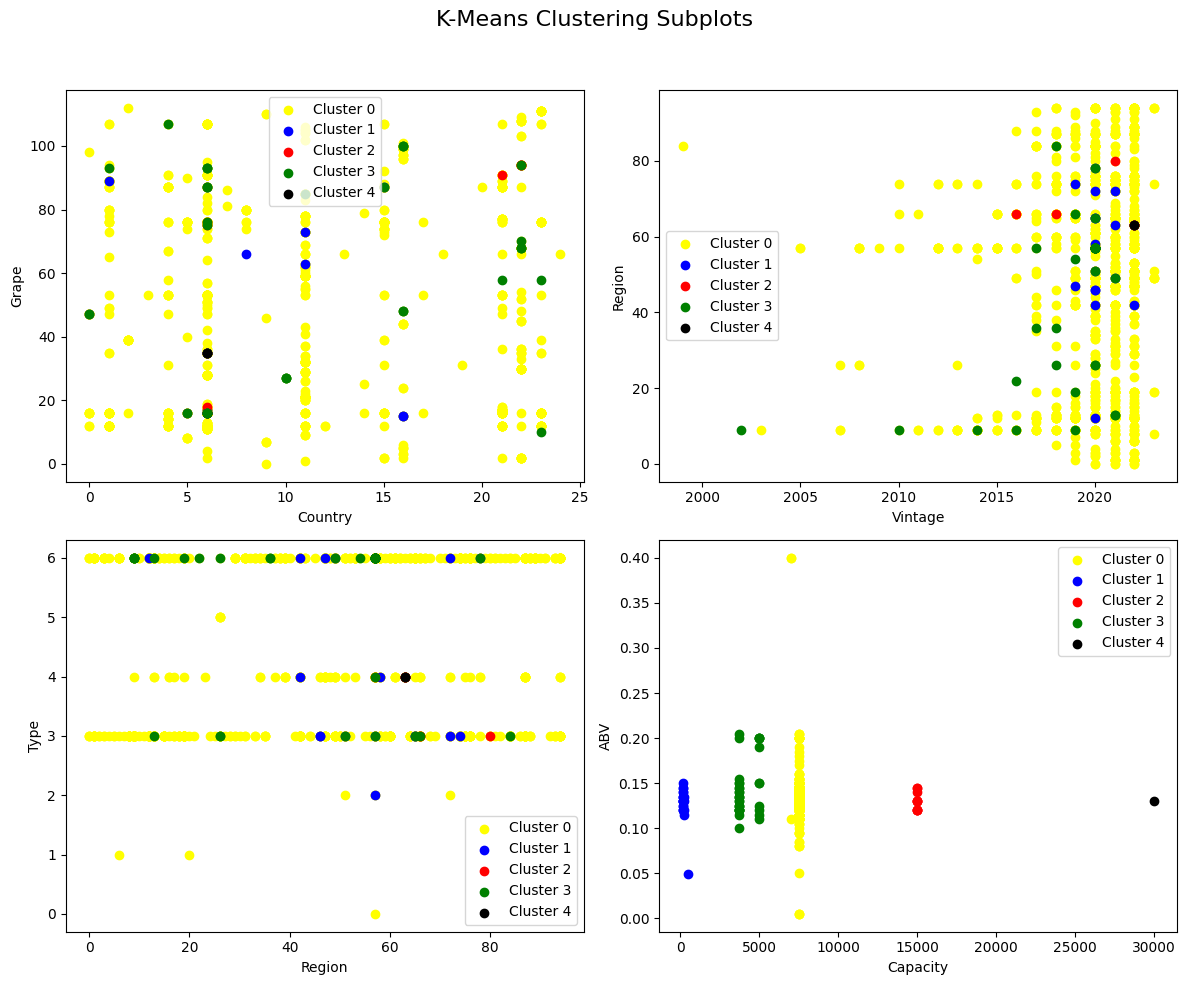

In [ ]:
# Configuración del modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=rn_state)
labels = kmeans.fit_predict(X)

# Colores para los clusters
colors = ['yellow', 'blue', 'red', 'green', 'black']

# Definir combinaciones de ejes para cada subplot
subplot_configs = [
    ("Country", "Grape"),
    ("Vintage", "Region"),
    ("Region", "Type"),
    ("Capacity", "ABV")
]

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("K-Means Clustering Subplots", fontsize=16)

# Iterar sobre las configuraciones y los ejes
for ax, (x_lab, y_lab) in zip(axes.ravel(), subplot_configs):
    for cluster_idx, color in enumerate(colors):
        filtered_data = X[labels == cluster_idx]
        ax.scatter(filtered_data[x_lab], filtered_data[y_lab], color=color, label=f"Cluster {cluster_idx}")
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.legend()

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título general
plt.show()


# Dimension reduction - Pincipal Component Analysis

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print('number of components:', pca.n_components_)
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

number of components: 230
sum of explained variance ratio: 0.9999999999999999


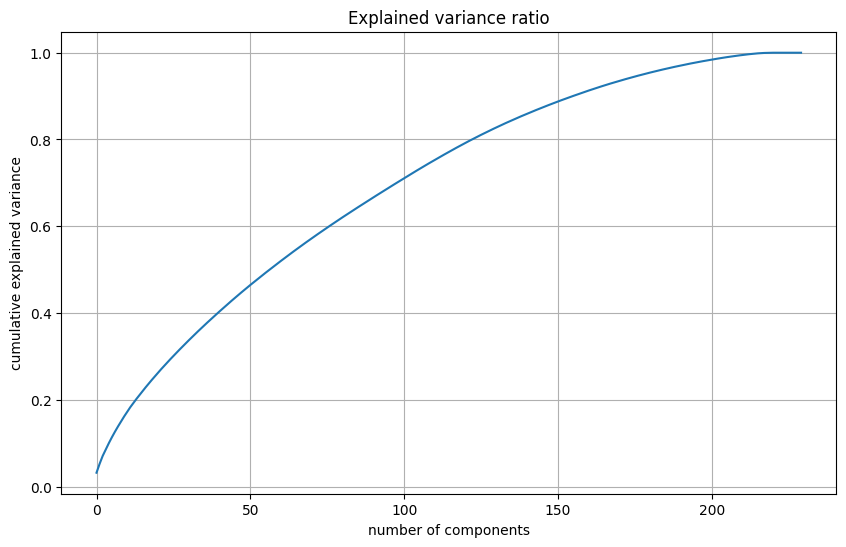

In [139]:
plt.figure(figsize=(10, 6))
plt.title('Explained variance ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

No tenemos un componente que destaque sobre los demás, por lo que no podemos reducir la información de gran forma, pero podemos descartar el mayor número posible

In [140]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1280, 179)

# Clustering + PCA

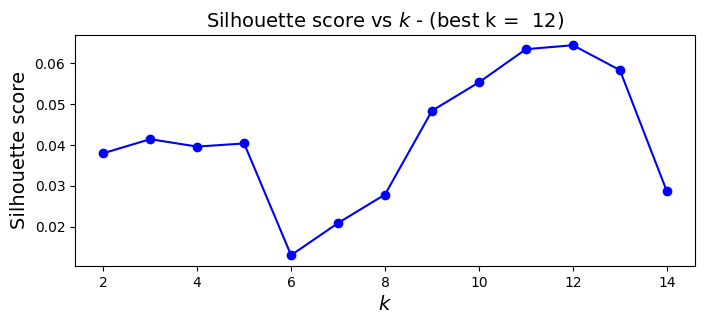

In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_k = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=rn_state).fit(X_pca) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")
plt.title(f"Silhouette score vs $k$ - (best k =  {np.argmax(silhouette_scores)+2})", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.show()

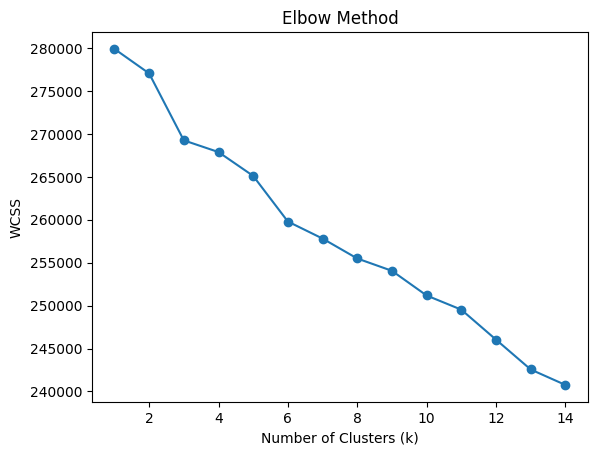

In [142]:
wcss = []
max_k = 15
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, max_k), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


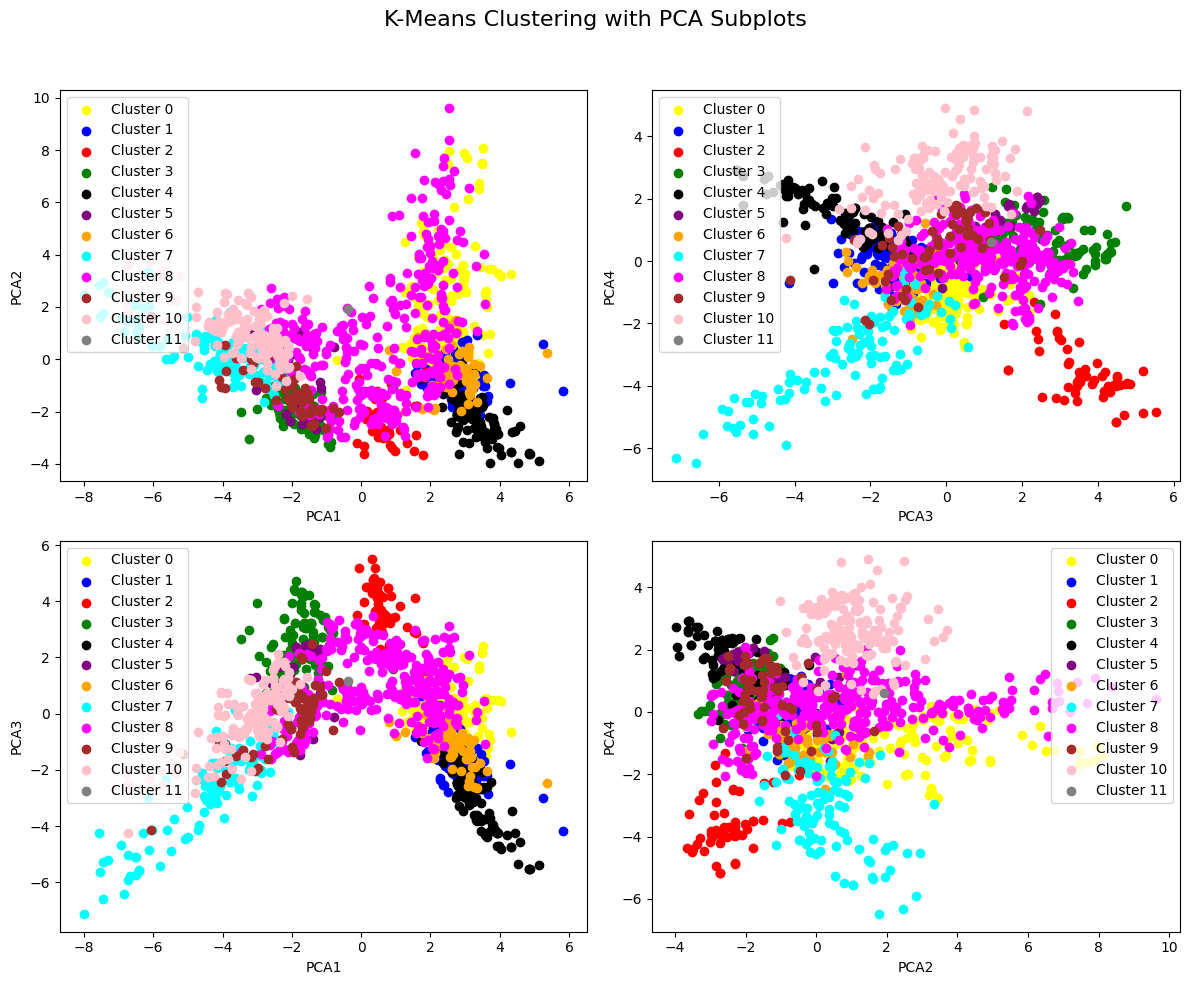

In [146]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Configuración del modelo KMeans
kmeans = KMeans(n_clusters=12, random_state=rn_state)
labels = kmeans.fit_predict(X_pca)

# Colores para los clusters
colors = ['yellow', 'blue', 'red', 'green', 'black', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

# Definir combinaciones de ejes para cada subplot
subplot_configs = [
    (0, 1, "PCA1", "PCA2"),
    (2, 3, "PCA3", "PCA4"),
    (0, 2, "PCA1", "PCA3"),
    (1, 3, "PCA2", "PCA4")
]

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("K-Means Clustering with PCA Subplots", fontsize=16)

# Iterar sobre las configuraciones y los ejes
for ax, (x_idx, y_idx, x_lab, y_lab) in zip(axes.ravel(), subplot_configs):
    for cluster_idx, color in enumerate(colors):
        filtered_data = X_pca[labels == cluster_idx]
        ax.scatter(filtered_data[:, x_idx], filtered_data[:, y_idx], color=color, label=f"Cluster {cluster_idx}")
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.legend()

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título general
plt.show()


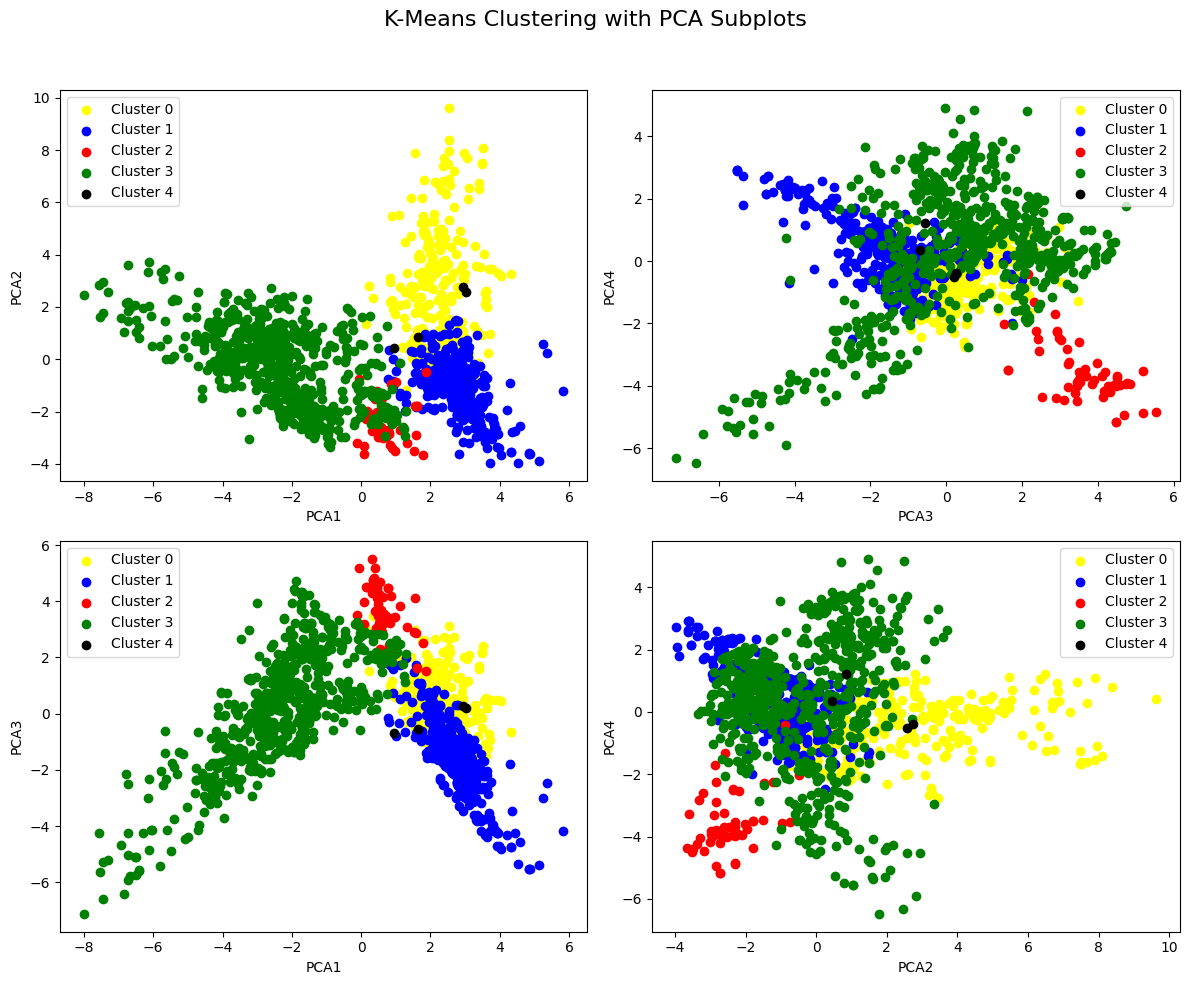

In [147]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Configuración del modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=rn_state)
labels = kmeans.fit_predict(X_pca)

# Colores para los clusters
colors = ['yellow', 'blue', 'red', 'green', 'black']

# Definir combinaciones de ejes para cada subplot
subplot_configs = [
    (0, 1, "PCA1", "PCA2"),
    (2, 3, "PCA3", "PCA4"),
    (0, 2, "PCA1", "PCA3"),
    (1, 3, "PCA2", "PCA4")
]

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("K-Means Clustering with PCA Subplots", fontsize=16)

# Iterar sobre las configuraciones y los ejes
for ax, (x_idx, y_idx, x_lab, y_lab) in zip(axes.ravel(), subplot_configs):
    for cluster_idx, color in enumerate(colors):
        filtered_data = X_pca[labels == cluster_idx]
        ax.scatter(filtered_data[:, x_idx], filtered_data[:, y_idx], color=color, label=f"Cluster {cluster_idx}")
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.legend()

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título general
plt.show()


# Conclusiones

Hemos visto un caso práctico de cómo plantear un trabajo de análisis de datos.

Hemos utilizado varias técnicas para poder trabajar con los datos y poder sacar conclusiones.

Hemos visto las utilidades de clusterización y de reducción de dimensiones.